In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
path = 'cleaned.csv'
df = pd.read_csv(path).dropna(how="any")

In [123]:
##### Only Wage Data
# X = df.drop(['Name', "FIPS", "% Total Crimes", 'Median Wage', "% Less then Highschool Diploma",'% High School Diploma Only', '% Some College or Associates',"% Bachelo's Degree or higher", '% Civilian Labor Force', "% Employed", "% Unemployed", '% Total Crimes'], axis=1)
##### Only education data
# X = df[["Highschool Diploma",'% High School Diploma Only', '% Some College or Associates',"% Bachelo's Degree or higher", '% Civilian Labor Force', "Employed", "% Unemployed"]]
##### All Data
X = df.drop(['Name', "FIPS", "% Total Crimes", 'Median Wage', "Highschool Diploma",'% High School Diploma Only', '% Some College or Associates',"% Bachelo's Degree or higher", '% Civilian Labor Force', "Employed", "% Unemployed", '% Total Crimes'], axis=1)
y = df['% Total Crimes']

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale everything
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)



In [126]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

In [127]:
def test_model(model):
    reg = model.fit(X_train_scale, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scale, y_train)}')
    print(f'Test Score: {reg.score(X_test_scale, y_test)}\n')
    print()
    plt.scatter(y_test, model.predict(X_test_scale))
    plt.show()


Model: LinearRegression
Train score: 0.059039677892990694
Test Score: 0.01312070104649532




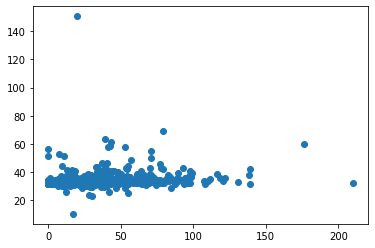

Model: KNeighborsRegressor
Train score: 0.36050950098284507
Test Score: -0.06283797924019896




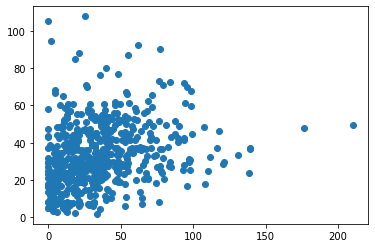

Model: RandomForestRegressor
Train score: 0.8705994182750738
Test Score: -0.02782366338298825




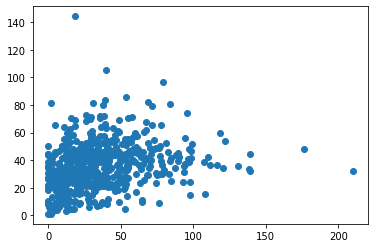

Model: ExtraTreesRegressor
Train score: 0.9881669650485769
Test Score: -0.05683265506892621




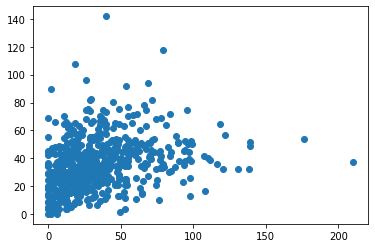

Model: AdaBoostRegressor
Train score: -0.13505424256103327
Test Score: -0.28724468412948845




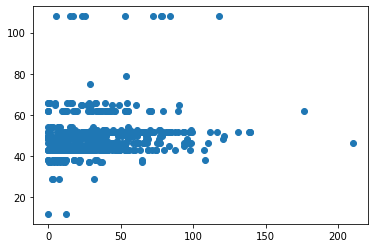

In [128]:
test_model(LinearRegression())
test_model(KNeighborsRegressor())
test_model(RandomForestRegressor())
test_model(ExtraTreesRegressor())
test_model(AdaBoostRegressor())